In [1300]:
# Goal of Project: future prediction as well as identify each user’s life patterns
# Import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import os 
import matplotlib.pyplot as plt
# Load data
device_df = pd.read_csv('device_uplink.csv')
user_information_df = pd.read_csv('user_information.csv')
data = device_df.sample(10)
print(data)

        Unnamed: 0  uplink_id  owner_id          client_time  tag_id   step  \
217134      217134    2340211       669  2020-12-02 19:50:13     0.0   4345   
284728      284728    3100323       655  2021-02-01 18:55:01    10.0   8333   
136121      136121    1661916       486  2020-10-20 19:05:04     2.0  10662   
37355        37355     814452       486  2020-08-26 10:20:39    10.0   2136   
75061        75061    1199682       664  2020-09-24 15:35:50    10.0   8183   
141781      141781    1700883       547  2020-10-23 09:50:12     0.0    567   
258388      258388    2782242       530  2021-01-05 12:00:10     0.0    104   
244070      244070    2602736       495  2020-12-23 11:41:39     9.0   4563   
315556      315556    3661932       658  2021-03-04 17:27:07    12.0  12959   
131355      131355    1630154       230  2020-10-18 19:18:19     1.0  19497   

        battery_low  is_charge  tag_battery_low  
217134           76          0                0  
284728           72          0

In [1301]:
device_df.dtypes #shows that client time and tag id must be changed to int

Unnamed: 0           int64
uplink_id            int64
owner_id             int64
client_time         object
tag_id             float64
step                 int64
battery_low          int64
is_charge            int64
tag_battery_low      int64
dtype: object

/var/folders/db/g89vnvfj68l9dp9q6zz747zh0000gn/T/ipykernel_3731/211885610.py:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  mp.show()


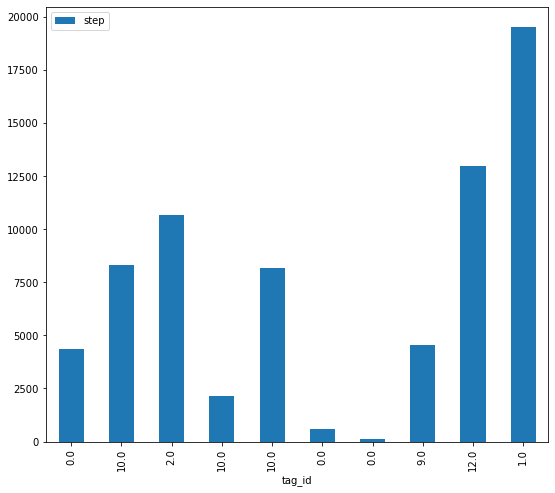

In [1302]:
import pandas as pd
import matplotlib.pyplot as mp
df = pd.DataFrame(data, columns=["tag_id", "step"])
# plot the dataframe
#df.plot(x="Name", y=["Price", "User Rating"], kind="bar", figsize=(9, 8))
df.plot(x="tag_id", y=["step"], kind="bar", figsize=(9, 8))
# print bar graph
mp.show()

/var/folders/db/g89vnvfj68l9dp9q6zz747zh0000gn/T/ipykernel_3731/3281594355.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  mp.show()


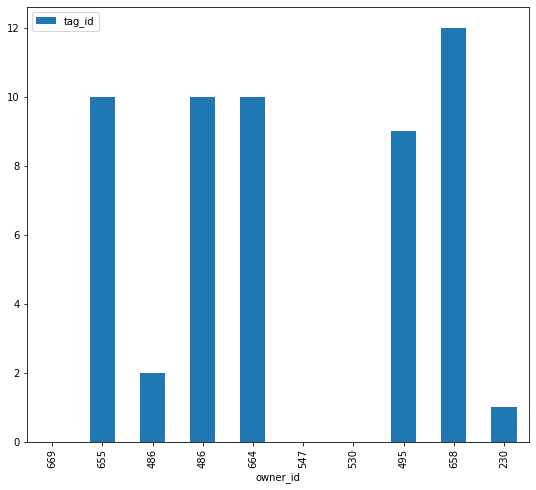

In [1303]:
df1 = pd.DataFrame(data, columns=["tag_id", "owner_id"])
df1.plot( x="owner_id", y=["tag_id"], kind="bar", figsize=(9, 8))
# print bar graph
mp.show()

In [1304]:
df2 = pd.DataFrame(data, columns=["tag_id", "client_time"])
#df2.plot( x="tag_id", y=["client_time"], kind="bar", figsize=(9, 8))
# print bar graph
#mp.show() # shows that time variable needs to be converted 

In [1305]:
device_df.isnull().sum() # This line of code relays that only tag id has missing values
#confirms that there are several nan values in tag_id 

Unnamed: 0            0
uplink_id             0
owner_id              0
client_time           0
tag_id             1206
step                  0
battery_low           0
is_charge             0
tag_battery_low       0
dtype: int64

In [1306]:
device_df.shape  # find the dimension of data frame
# The dimension of the data frame helps identify the number of rows and columns in the data
# The dimension should be reduced because a high dimension can lead to an increase in the 
# model's complexity, increase the amount of data needed exponentially, and work in an 
# unexpected direction 

(324823, 9)

In [1307]:
device_df.columns # prints the list of variables/tags

Index(['Unnamed: 0', 'uplink_id', 'owner_id', 'client_time', 'tag_id', 'step',
       'battery_low', 'is_charge', 'tag_battery_low'],
      dtype='object')

In [1308]:
userInfo_df = pd.read_csv('user_info.csv')
userInfo_df.sample(10) # Q1: Random sample of 10 observations
# The initial observations based on the random samples are listed below:
# The data suggests that the majority of records are of Females aged in their 70s or 80s
# The data also suggests that there are several missing values in the etc column

,id,birth year,age,sex,etc
41,585,1939,83,M,"협심증약, 고지혈약, 혈압약, 아스피린복용. 15년넘게 심장약 복용중이고 매일 허리..."
40,650,1939,83,M,"신장약, 혈압"
50,655,1948,74,M,NaN
26,582,1948,74,F,"차상위, 혈압, 당뇨, 관절"
8,503,1940,82,F,난청이 있으며 신경통약 복용
6,496,1939,83,F,"당뇨, 허리협착증, 저혈당, 갑자기 쓰러지기도"
3,495,1937,85,F,NaN
25,583,1948,74,F,무자녀
36,634,1937,85,M,"혈압, 전립선"
39,232,1939,83,M,NaN


In [1309]:
userInfo_df.shape  # find the dimension of data frame (rows,columns)

(52, 5)

In [1310]:
userInfo_df.columns # prints the list of variables/tags

Index(['id', 'birth year', 'age', 'sex', 'etc'], dtype='object')

In [1311]:
userInfo_df.isnull().sum() # Q2: Code suggests that the etc column has 19 missing values
# Because the variable is not numerical and is not an int, we will have to deal with the 
# missing values by replacing the null values with the mode of the data

id             0
birth year     0
age            0
sex            0
etc           19
dtype: int64

In [1312]:
userInfo_df.dtypes

id             int64
birth year     int64
age            int64
sex           object
etc           object
dtype: object

In [1313]:
device_df['client time'] = pd.to_datetime(device_df['client_time'])

In [1314]:
device_df.dtypes

Unnamed: 0                  int64
uplink_id                   int64
owner_id                    int64
client_time                object
tag_id                    float64
step                        int64
battery_low                 int64
is_charge                   int64
tag_battery_low             int64
client time        datetime64[ns]
dtype: object

In [1315]:
userInfo_df['etc'] = userInfo_df['etc'].fillna(value='')
device_df['tag_id'] = device_df['tag_id'].fillna(value = 0.0)
device_df['tag_id'] = [int(n) for n in device_df['tag_id']]

In [1316]:
device_df = device_df.loc[device_df['owner_id']>=0]
userInfo_df = userInfo_df.drop(columns = ['birth year'])

In [1317]:
device_df = device_df.loc[device_df['tag_id'] <18]
userInfo_df['sex'] = userInfo_df['sex'].astype('category')
userInfo_df['sex'] = pd.get_dummies(userInfo_df['sex'], prefix_sep='_', drop_first=True)

/var/folders/db/g89vnvfj68l9dp9q6zz747zh0000gn/T/ipykernel_3731/3178975808.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


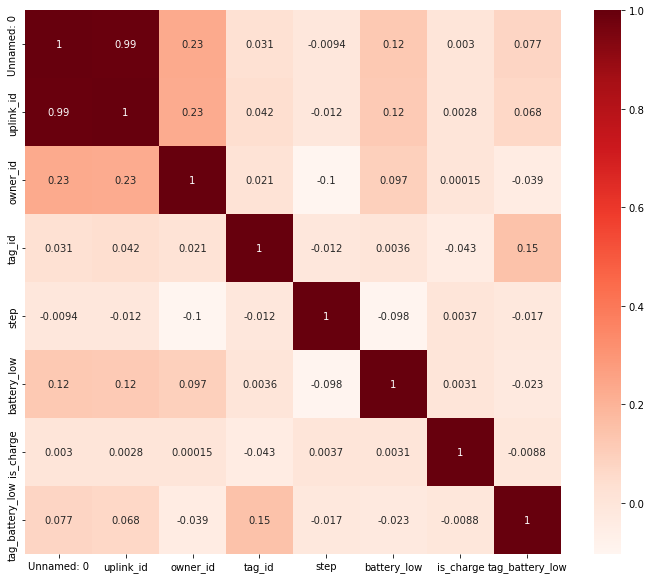

In [1318]:
plt.figure(figsize=(12,10))
cor = device_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [1319]:
print(device_df[["tag_id","step"]].corr())
print(device_df[["battery_low","tag_id"]].corr())

          tag_id      step
tag_id  1.000000 -0.011967
step   -0.011967  1.000000
             battery_low    tag_id
battery_low     1.000000  0.003578
tag_id          0.003578  1.000000


NameError: name 'user_information_df' is not defined

In [2]:
#Project 2
user_information_df.head() #sample of new csv file

NameError: name 'user_information_df' is not defined

In [1321]:
user_information_df.dtypes 

user_id               int64
birth year            int64
age                   int64
sex                  object
etc                  object
depression_score    float64
depression_class     object
dtype: object

In [1322]:
user_information_df.shape

(53, 7)

In [1323]:
user_information_df.rename(columns = {'user_id':'id', 'age':'age'}, inplace = True) #rename column

In [1358]:
#merge csv files and rename columns
users_df = user_information_df.merge(userInfo_df, on = 'id')
user1_df = users_df.drop(labels=['age_y', 'sex_y', 'etc_y'], axis=1)
user1_df.rename(columns={'age_x':'age', 'sex_x': 'sex', 'etc_x': 'etc'}, inplace= True)

In [1359]:
# tag_id is converted to dummy variable to use in regression models 
tag_id = pd.get_dummies(device_df['tag_id'])
print(tag_id.head())

    0   3   4   5   8   10
4    1   0   0   0   0   0
6    1   0   0   0   0   0
9    1   0   0   0   0   0
11   1   0   0   0   0   0
12   1   0   0   0   0   0


In [1360]:
#dummy variables for user 495, 496, and users assigned 
data495_df = pd.read_csv('data_495.csv')
data496_df = pd.read_csv('data_496.csv')
data524_df = pd.read_csv('data_524.csv')
data582_df = pd.read_csv('data_582.csv')
data664_df = pd.read_csv('data_664.csv')
data495_df = pd.get_dummies(data495_df, columns =['tag_0','tag_1','tag_2','tag_3','tag_4','tag_5','tag_6','tag_7','tag_8','tag_9','tag_10','tag_11','tag_12'])
data496_df = pd.get_dummies(data496_df, columns =['tag_0','tag_1','tag_2','tag_3','tag_4','tag_5','tag_6','tag_7','tag_8','tag_9','tag_10','tag_11','tag_12'])
data524_df = pd.get_dummies(data524_df, columns =['tag_0','tag_1','tag_2','tag_3','tag_4','tag_5','tag_6','tag_7','tag_8','tag_9','tag_10','tag_11','tag_12'])
data582_df = pd.get_dummies(data582_df, columns =['tag_0','tag_1','tag_2','tag_3','tag_4','tag_5','tag_6','tag_7','tag_8','tag_9','tag_10','tag_11','tag_12'])
data664_df = pd.get_dummies(data664_df, columns =['tag_0','tag_1','tag_2','tag_3','tag_4','tag_5','tag_6','tag_7','tag_8','tag_9','tag_10','tag_11','tag_12'])
display(data524_df)

,Unnamed: 0,client_time,step,battery_low,is_charge,tag_battery_low,tag_0_0,tag_0_1,tag_1_0,tag_1_1,...,tag_7_0,tag_8_0,tag_9_0,tag_9_1,tag_10_0,tag_10_1,tag_11_0,tag_11_1,tag_12_0,tag_12_1
0,14052,2020-08-04 14:03:46,1069,29,0,0,1,0,1,0,...,1,1,1,0,0,1,1,0,1,0
1,14053,2020-08-04 14:07:54,1107,31,0,0,1,0,1,0,...,1,1,1,0,1,0,1,0,1,0
2,14054,2020-08-04 14:10:11,1114,30,0,0,1,0,1,0,...,1,1,1,0,1,0,1,0,1,0
3,14055,2020-08-04 14:12:03,1122,29,0,0,1,0,1,0,...,1,1,1,0,1,0,1,0,0,1
4,14056,2020-08-04 14:12:31,1133,29,0,0,1,0,1,0,...,1,1,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9477,160002,2020-11-02 10:31:57,867,21,0,0,0,1,1,0,...,1,1,1,0,1,0,1,0,1,0
9478,160007,2020-11-02 10:38:00,919,22,0,0,1,0,1,0,...,1,1,1,0,1,0,1,0,0,1
9479,160008,2020-11-02 10:38:25,927,21,0,0,1,0,1,0,...,1,1,1,0,1,0,1,0,1,0
9480,160009,2020-11-02 10:39:28,955,21,0,0,1,0,1,0,...,1,1,1,0,1,0,1,0,1,0


In [1361]:
#multiple linear regression model to depression score using tag id, step, and battery low as predictors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
device_df = device_df.iloc[0:53] #53 samples due to shape of user1 df 

#predictors and outcome
predictors = ['tag_id', 'step', 'battery_low']
outcome = 'depression_score'

# partition data 60% training 40% validation
X = pd.get_dummies(device_df[predictors], drop_first=True)
y = user1_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

depression_lm = LinearRegression()
depression_lm.fit(train_X, train_y)

# print coefficients
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': depression_lm.coef_}))

# print performance measures (training data)
regressionSummary(train_y, depression_lm.predict(train_X))
depression_lm_pred = depression_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': depression_lm_pred, 'Actual': valid_y,'Residual': valid_y - depression_lm_pred})
print(result.head(20))

#Equation
# Y denoted as depression score
# Y =  0.4278355158048195 + (-0.037461*tag_id) +  (-0.000005*step) + (0.000627*battery_low)
print(depression_lm.intercept_) #for equation(b0- meaning value when all is equal to 0)
print(depression_lm.coef_)
#positive coefficient from battery_low shows that as the "value of the independent variable increases, 
#the mean of the dependent variable also increases"

     Predictor  coefficient
0       tag_id    -0.037461
1         step    -0.000005
2  battery_low     0.000627

Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 0.2940
     Mean Absolute Error (MAE) : 0.2421
    Predicted  Actual  Residual
30   0.479116   0.625  0.145884
2    0.404174   0.125 -0.279174
51   0.404110   0.000 -0.404110
32   0.467960   0.125 -0.342960
31   0.470356   0.000 -0.470356
46   0.417404   0.000 -0.417404
34   0.463685   0.625  0.161315
39   0.444639   0.375 -0.069639
45   0.421871   0.250 -0.171871
19   0.112076   0.500  0.387924
10   0.445737   0.000 -0.445737
3    0.432602   0.250 -0.182602
21   0.335982   0.000 -0.335982
49   0.405671   0.000 -0.405671
38   0.449919   0.000 -0.449919
41   0.437635   0.125 -0.312635
24   0.484659   0.500  0.015341
42   0.436481   0.875  0.438519
40   0.439253   0.000 -0.439253
35   0.461401   0.500  0.038599
0.4278355158048195
[-3.74608102e-02 -5.39172374e-06  6.26904658e-04]


0.8636363636363636


/var/folders/db/g89vnvfj68l9dp9q6zz747zh0000gn/T/ipykernel_3731/2929344346.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


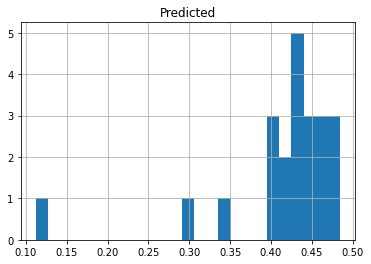

In [1362]:
all_predicted = depression_lm_pred 
# Determine the percentage of datapoints with predicted values [.4, .5] = approx.
# 75%
# The percentage of datapoints with a predicted value in [.4, .5] = 75%
print(len(all_predicted[(all_predicted > .4) & (all_predicted < .5)]) / len(all_predicted))
pd.DataFrame({'Predicted': all_predicted}).hist(bins=25)
plt.show()

0.0


/var/folders/db/g89vnvfj68l9dp9q6zz747zh0000gn/T/ipykernel_3731/43860018.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


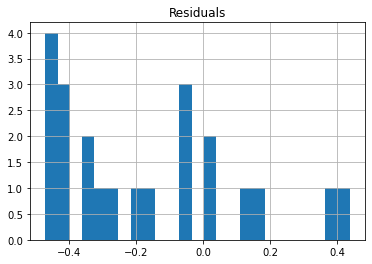

In [1363]:
all_residuals = valid_y - depression_lm_pred
# Determine the percentage of datapoints with a residual in [-.8, 1] = approx.
# 75%
# The percentage of datapoints with a residual in [-.8, 1] = 75%
print(len(all_residuals[(all_residuals > -.8) & (all_residuals < -1)]) / len(all_residuals))
pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)
plt.show()

Variables: tag_id, step, battery_low
Start: score=18.50, constant
Step: score=18.45, add tag_id
Step: score=18.45, add None
['tag_id']

Regression statistics

               Mean Error (ME) : -0.1643
Root Mean Squared Error (RMSE) : 0.3189
     Mean Absolute Error (MAE) : 0.2812


/var/folders/db/g89vnvfj68l9dp9q6zz747zh0000gn/T/ipykernel_3731/361883891.py:41: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


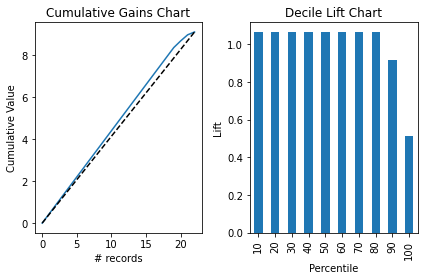

In [1364]:
# Forward Regression (Part C)
from dmba import forward_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt
from dmba import regressionSummary, classificationSummary
from dmba import liftChart, gainsChart 
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
def train_model(variables):
    if len(variables) == 0:
         return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model
def score_model(model, variables):
     if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y),model, df=1)
     return AIC_score(train_y, model.predict(train_X[variables]), model)
best_model, best_variables = forward_selection(train_X.columns, train_model, score_model,verbose=True)
print(best_variables)


# print performance measures (validation data)
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))

pred_v = pd.Series(best_model.predict(valid_X[best_variables]))
pred_v = pred_v.sort_values(ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative Value')
ax.set_title('Cumulative Gains Chart')

ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')

plt.tight_layout()
plt.show()

Variables: tag_id, step, battery_low
Start: score=22.07
Step: score=20.13, remove battery_low
Step: score=18.45, remove step
['tag_id']

Regression statistics

               Mean Error (ME) : -0.1643
Root Mean Squared Error (RMSE) : 0.3189
     Mean Absolute Error (MAE) : 0.2812


/var/folders/db/g89vnvfj68l9dp9q6zz747zh0000gn/T/ipykernel_3731/178878256.py:27: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


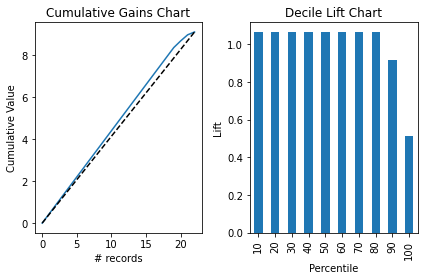

In [1365]:
# Backward Regression (Part C)
from dmba import backward_elimination

def score_model(model, variables):
     return AIC_score(train_y, model.predict(train_X[variables]), model)
allVariables = train_X.columns
best_model, best_variables = backward_elimination(allVariables, train_model, score_model, verbose=True)
print(best_variables)

# print performance measures (validation data)
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))

#Backward and forward regression have same regression summary(results) and predictor(tag_id) as best variable

pred_v = pd.Series(best_model.predict(valid_X[best_variables]))
pred_v = pred_v.sort_values(ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative Value')
ax.set_title('Cumulative Gains Chart')

ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')

plt.tight_layout()
plt.show()

Variables: tag_id, step, battery_low
Start: score=18.50, constant
Step: score=18.45, add tag_id
Step: score=18.45, unchanged None
['tag_id']

Regression statistics

               Mean Error (ME) : -0.1643
Root Mean Squared Error (RMSE) : 0.3189
     Mean Absolute Error (MAE) : 0.2812


/var/folders/db/g89vnvfj68l9dp9q6zz747zh0000gn/T/ipykernel_3731/3387528008.py:32: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


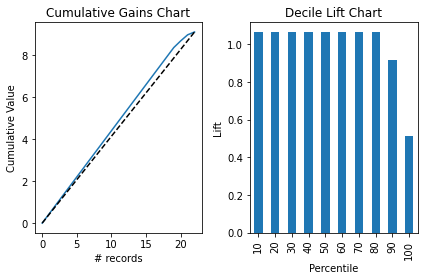

In [1366]:
# Both(stepwise regression)
from dmba import stepwise_selection

def train_model(variables):
    if len(variables) == 0:
         return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model
def score_model(model, variables):
     if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y),model, df=1)
     return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)
print(best_variables)
# print performance measures (validation data)
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))

pred_v = pd.Series(best_model.predict(valid_X[best_variables]))
pred_v = pred_v.sort_values(ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative Value')
ax.set_title('Cumulative Gains Chart')

ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')

plt.tight_layout()
plt.show()

#stepwise also yields same results(predictor and regression statistics)
#three regression methods show that tag_id is the most important predictor for depression score
#all hold same statistics and lift chart
#all three yield the same RMSE, therefore all are effective models
#all three improved compared to regular multiple regression from part a, as the RMSE moved from 0.2940 to 0.3189

      Predictor   coefficient
0       tag_0_0 -2.239917e-02
1       tag_1_0 -7.013471e-01
2       tag_2_0  4.043185e-01
3       tag_3_0 -4.440892e-16
4       tag_4_0  1.110223e-16
5       tag_5_0  5.273559e-16
6       tag_6_0 -2.324013e-02
7       tag_7_0  0.000000e+00
8       tag_8_0  0.000000e+00
9       tag_9_0 -4.168492e-01
10     tag_10_0  0.000000e+00
11     tag_11_0  6.102884e-01
12     tag_12_0  1.492287e-01
13         step -2.012455e-05
14  battery_low -9.034661e-03

Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 0.2596
     Mean Absolute Error (MAE) : 0.2056
0    0.108407
1    0.108407
2    0.130806
3    0.130806
4    0.130806
dtype: float64


/Users/cynthiazapata/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/cynthiazapata/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='depression_score', ylabel='Density'>

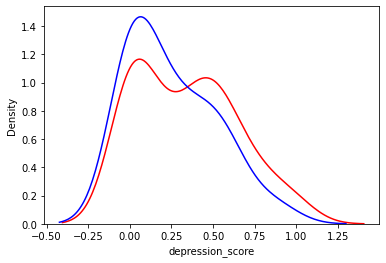

In [1367]:
#predicting 495
data495_df = data495_df.iloc[0:53]
predictors = ['tag_0_0','tag_1_0','tag_2_0','tag_3_0','tag_4_0','tag_5_0','tag_6_0','tag_7_0','tag_8_0','tag_9_0','tag_10_0','tag_11_0','tag_12_0', 'step', 'battery_low']
outcome = 'depression_score'

# partition data 60% training 40% validation
X = pd.get_dummies(data495_df[predictors], drop_first=True)
y = user1_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

depression_lm = LinearRegression()
depression_lm.fit(train_X, train_y)

print(pd.DataFrame({'Predictor': X.columns, 'coefficient': depression_lm.coef_}))
regressionSummary(train_y, depression_lm.predict(train_X))


#the predicted depression score for this user is 0.1308, moderately severe- also shown in naive bayes below
#the prediction error(RMSE) is 0.2596

depression =  0.4278355158048195 + (-2.2399e-02*data496_df['tag_0_0']) + (-7.0135e-01*data496_df['tag_1_0']) + (4.0432e-01*data496_df['tag_2_0']) + (-4.4409e-16*data496_df['tag_3_0'])
+ (1.1102e-16*data496_df['tag_4_0']) + (5.2736e-16*data496_df['tag_5_0']) + (-2.3240e-02*data496_df['tag_6_0']) + (0.0000e+00*data496_df['tag_7_0']) 
+ (0.0000e+00*data496_df['tag_8_0']) + (-4.1685e-01*data496_df['tag_9_0']) + (0.0000e+00*data496_df['tag_10_0']) + (6.1029e-01*data496_df['tag_11_0']) 
+  (1.4923e-01*data496_df['tag_12_0']) + (-2.0125e-05*data496_df['step']) + (-9.0347e-03*data496_df['battery_low'])
print(depression.head())

ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(valid_y, hist=False, color="b", label="Fitted Values" , ax=ax1)

      Predictor   coefficient
0       tag_0_0  1.718506e-02
1       tag_1_0  1.701243e-14
2       tag_2_0  3.567644e-01
3       tag_3_0  0.000000e+00
4       tag_4_0 -2.775558e-17
5       tag_5_0  0.000000e+00
6       tag_6_0  0.000000e+00
7       tag_7_0  0.000000e+00
8       tag_8_0  0.000000e+00
9       tag_9_0 -4.095791e-02
10     tag_10_0 -2.927913e-01
11     tag_11_0 -4.020022e-02
12     tag_12_0  0.000000e+00
13         step -5.638785e-05
14  battery_low  2.707849e-03

Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 0.2823
     Mean Absolute Error (MAE) : 0.2297
0    0.801781
1    0.801781
2    0.784596
3    0.784596
4    0.784596
dtype: float64


/Users/cynthiazapata/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/cynthiazapata/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='depression_score', ylabel='Density'>

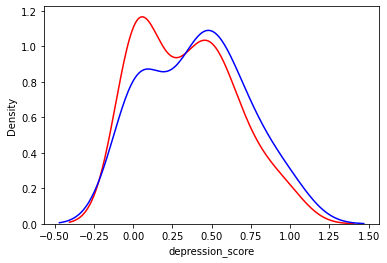

In [1368]:
#predicting 496
data496_df = data496_df.iloc[0:53]
predictors = ['tag_0_0','tag_1_0','tag_2_0','tag_3_0','tag_4_0','tag_5_0','tag_6_0','tag_7_0','tag_8_0','tag_9_0','tag_10_0','tag_11_0','tag_12_0', 'step', 'battery_low']
outcome = 'depression_score'

# partition data 60% training 40% validation
X = pd.get_dummies(data496_df[predictors], drop_first=True)
y = user1_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

depression_lm = LinearRegression()
depression_lm.fit(train_X, train_y)

print(pd.DataFrame({'Predictor': X.columns, 'coefficient': depression_lm.coef_}))
regressionSummary(train_y, depression_lm.predict(train_X))

depression =  0.4278355158048195 + (1.7185e-02*data496_df['tag_0_0']) + (1.7012e-14*data496_df['tag_1_0']) + (3.5676e-01*data496_df['tag_2_0'])+ (0.0000e+00*data496_df['tag_3_0'])
+ (-2.7756e-17*data496_df['tag_4_0']) + (0.0000e+00*data496_df['tag_5_0']) + (0.0000e+00*data496_df['tag_6_0']) + (0.0000e+00*data496_df['tag_7_0']) 
+ (0.0000e+00*data496_df['tag_8_0']) + (-4.0958e-02*data496_df['tag_9_0']) + (-2.9279e-01*data496_df['tag_10_0']) + (-4.0200e-02*data496_df['tag_11_0']) 
+  (0.0000e+00*data496_df['tag_12_0']) + (-5.6388e-05*data496_df['step']) + (2.7078e-03*data496_df['battery_low'])
print(depression.head())

ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(train_y, hist=False, color="b", label="Fitted Values" , ax=ax1)
#the depression score is 0.7846
#the prediction error(RMSE) is 0.2823

In [1369]:
#merge csv files and rename columns
device_df.rename(columns = {'owner_id':'id', 'age':'age'}, inplace = True) #rename column
allUsers_df = device_df.merge(user1_df, on = 'id')
allUsers_df.sample(10)

,Unnamed: 0,uplink_id,id,client_time,tag_id,step,battery_low,is_charge,tag_battery_low,client time,birth year,age,sex,etc,depression_score,depression_class
20,70,50914,230,2019-12-02 12:29:59,0,1084,92,0,0,2019-12-02 12:29:59,1950,72,F,Not applicable,0.125,Normal
29,79,51185,230,2019-12-02 15:09:59,0,5671,84,0,0,2019-12-02 15:09:59,1950,72,F,Not applicable,0.125,Normal
27,77,51116,230,2019-12-02 14:29:58,0,4743,86,0,0,2019-12-02 14:29:58,1950,72,F,Not applicable,0.125,Normal
17,67,50854,230,2019-12-02 11:35:10,5,654,94,0,0,2019-12-02 11:35:10,1950,72,F,Not applicable,0.125,Normal
5,26,367073,230,1970-01-01 00:00:00,0,1552,81,0,0,1970-01-01 00:00:00,1950,72,F,Not applicable,0.125,Normal
25,75,50993,230,2019-12-02 14:10:00,0,3583,88,0,0,2019-12-02 14:10:00,1950,72,F,Not applicable,0.125,Normal
24,74,50978,230,2019-12-02 13:59:58,0,3152,88,0,0,2019-12-02 13:59:58,1950,72,F,Not applicable,0.125,Normal
21,71,50923,230,2019-12-02 12:40:01,0,1186,92,0,0,2019-12-02 12:40:01,1950,72,F,Not applicable,0.125,Normal
13,63,50840,230,2019-12-02 11:28:53,4,605,95,0,0,2019-12-02 11:28:53,1950,72,F,Not applicable,0.125,Normal
30,80,51204,230,2019-12-02 15:39:59,0,6534,83,0,0,2019-12-02 15:39:59,1950,72,F,Not applicable,0.125,Normal


Variables: tag_0_0, tag_1_0, tag_2_0, tag_3_0, tag_4_0, tag_5_0, tag_6_0, tag_7_0, tag_8_0, tag_9_0, tag_10_0, tag_11_0, tag_12_0, step, battery_low
Start: score=43.56
Step: score=41.56, remove tag_0_0
Step: score=39.56, remove tag_3_0
Step: score=37.56, remove tag_4_0
Step: score=35.56, remove tag_1_0
Step: score=33.56, remove tag_12_0
Step: score=31.56, remove tag_5_0
Step: score=29.56, remove tag_6_0
Step: score=27.56, remove tag_7_0
Step: score=25.56, remove tag_8_0
Step: score=23.60, remove tag_11_0
Step: score=21.70, remove tag_9_0
Step: score=20.27, remove battery_low
Step: score=18.96, remove step
Step: score=18.64, remove tag_10_0
['tag_2_0']

Regression statistics

               Mean Error (ME) : -0.1098
Root Mean Squared Error (RMSE) : 0.3348
     Mean Absolute Error (MAE) : 0.2879


/var/folders/db/g89vnvfj68l9dp9q6zz747zh0000gn/T/ipykernel_3731/178878256.py:27: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


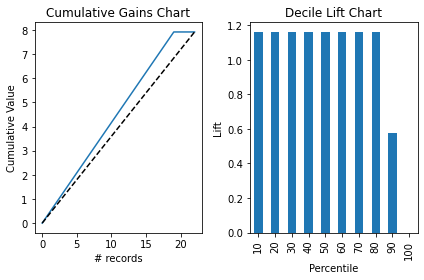

In [1370]:
# Backward Regression (Part C)
from dmba import backward_elimination

def score_model(model, variables):
     return AIC_score(train_y, model.predict(train_X[variables]), model)
allVariables = train_X.columns
best_model, best_variables = backward_elimination(allVariables, train_model, score_model, verbose=True)
print(best_variables)

# print performance measures (validation data)
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))

#Backward and forward regression have same regression summary(results) and predictor(tag_id) as best variable

pred_v = pd.Series(best_model.predict(valid_X[best_variables]))
pred_v = pred_v.sort_values(ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative Value')
ax.set_title('Cumulative Gains Chart')

ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')

plt.tight_layout()
plt.show()

In [1371]:
#naive bayes classifier with depression class as outcome
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pylab as plt 
from dmba import classificationSummary, gainsChart

#categorize predictors
allUsers_df.step = allUsers_df.step.astype('category')
allUsers_df['step'] = allUsers_df['step'].astype('category')
allUsers_df.battery_low = allUsers_df.battery_low.astype('category')
allUsers_df['battery_low'] = allUsers_df['battery_low'].astype('category')
allUsers_df.id = allUsers_df.id.astype('category')
allUsers_df['id'] = allUsers_df['id'].astype('category')

predictors = ['step', 'id', 'battery_low']
outcome = 'depression_class'

x = pd.get_dummies(allUsers_df[predictors])
y = allUsers_df['depression_class'].astype('category')
classes = list(y.cat.categories)



In [1372]:

#split into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.40, random_state=1) 
 # run naive Bayes
allUsers_nb = MultinomialNB(alpha=0.01)
allUsers_nb.fit(X_train, y_train)

# predict probabilities
predProb_train = allUsers_nb.predict_proba(X_train)
predProb_valid = allUsers_nb.predict_proba(X_valid)

# predict class membership
y_valid_pred = allUsers_nb.predict(X_valid)



In [1373]:
# split the original data frame into a train and test using the same random_state
train_df,valid_df = train_test_split(allUsers_df, test_size=0.4, random_state=1)

pd.set_option('precision', 4)
# probability of depression_class

probability = train_df['depression_class'].value_counts() / len(train_df)
print(probability)
#len(train_df)
print()

for predictor in predictors:
    # construct the frequency table
    df = train_df[['depression_class', predictor]]
    freqTable = df.pivot_table(index='depression_class', columns=predictor, aggfunc=len)

    # divide each value by the sum of the row to get conditional probabilities
    propTable = freqTable.apply(lambda x: x / allUsers_df.depression_score.sum(), axis=1)
    print(propTable)
    print()
pd.reset_option('precision')


Normal               0.9032
Moderate             0.0645
Moderately severe    0.0323
Name: depression_class, dtype: float64

step                 421    441    448    472    489    511    523    574  \
depression_class                                                            
Moderate             NaN    NaN    NaN    NaN    NaN  0.129    NaN    NaN   
Moderately severe    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Normal             0.129  0.129  0.129  0.129  0.129    NaN  0.129  0.129   

step                 615    623  ...   6563   8047   8840  10408  11004  \
depression_class                 ...                                      
Moderate             NaN    NaN  ...    NaN    NaN  0.129    NaN    NaN   
Moderately severe    NaN    NaN  ...  0.129    NaN    NaN    NaN    NaN   
Normal             0.129  0.129  ...    NaN  0.129    NaN  0.129  0.129   

step               13117  13271  13272  14853  15244  
depression_class                                      
Mode

In [1374]:
## cutoff = 0.9032
predicted = ['Normal' if p >= .9032 else 'Moderate' for p in allUsers_df.depression_score]
classificationSummary(allUsers_df.depression_class, predicted, ['Moderate', 'Moderately severe', 'Normal'])

Confusion Matrix (Accuracy 0.0377)

                  Prediction
           Actual          Moderate Moderately severe            Normal
         Moderate                 2                 0                 0
Moderately severe                 2                 0                 0
           Normal                49                 0                 0


In [1375]:
## cutoff = 0.0645
predicted = ['Moderate' if p >= 0.0645 else 'Moderately sevevre' for p in allUsers_df.depression_score]
classificationSummary(allUsers_df.depression_class, predicted, ['Moderate', 'Moderately severe', 'Normal'])

Confusion Matrix (Accuracy 0.0377)

                  Prediction
           Actual          Moderate Moderately severe            Normal
         Moderate                 2                 0                 0
Moderately severe                 2                 0                 0
           Normal                 0                 0                 0


In [1376]:
## cutoff = .0323
predicted = ['Moderately severe' if p >= 0.0323 else 'None' for p in allUsers_df.depression_score]
classificationSummary(allUsers_df.depression_class, predicted, ['Moderate', 'Moderately severe', 'Normal'])

Confusion Matrix (Accuracy 0.0377)

                  Prediction
           Actual          Moderate Moderately severe            Normal
         Moderate                 0                 2                 0
Moderately severe                 0                 2                 0
           Normal                 0                 0                 0


/var/folders/db/g89vnvfj68l9dp9q6zz747zh0000gn/T/ipykernel_3731/62658708.py:12: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


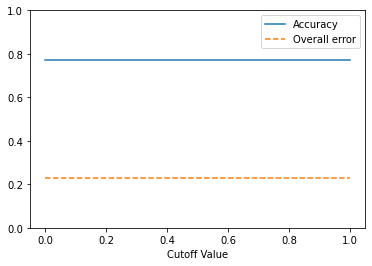

In [1377]:
cutoffs = [i * 0.1 for i in range(0, 11)]
accT = []
for cutoff in cutoffs:
    predicted = [1 if p > cutoff else 0 for p in probability]
    accT.append(accuracy_score(y_valid, y_valid_pred))

line_accuracy = plt.plot(cutoffs, accT, '-', label='Accuracy')[0]
line_error = plt.plot(cutoffs, [1 - acc for acc in accT], '--', label='Overall error')[0]
plt.ylim([0,1])
plt.xlabel('Cutoff Value')
plt.legend(handles=[line_accuracy, line_error])
plt.show()

In [1378]:
from sklearn.metrics import roc_curve, auc
# compute ROC curve and AUC for specificity and sensitivity 
fpr, tpr, _ = roc_curve(y_valid, y_valid_pred, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[5, 5])
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U17'), dtype('<U17')) -> dtype('<U17')

In [ ]:
# probability of a u(ser having ‘moderately severe’ depression when their average total steps per day is below 10000?
# 0.03757 (as shown below)
df = pd.concat([pd.DataFrame({'actual': y_valid, 'predicted': y_valid_pred}),
                pd.DataFrame(predProb_valid, index=y_valid.index)], axis=1)
mask = ((X_valid.step >= 1000)& (y_valid == "Moderately severe")) 

df[mask]

,actual,predicted,0,1,2
46,Moderately severe,Moderately severe,0.03757,0.96243,1.080246e-32


<AxesSubplot:xlabel='# records', ylabel='# cumulative gains'>

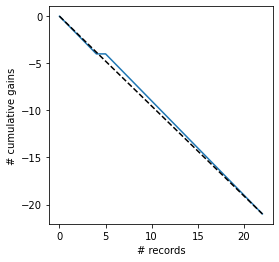

In [ ]:
df = pd.DataFrame({'actual': 1 - y_valid.cat.codes, 'prob': predProb_valid[:, 0]})
df = df.sort_values(by=['prob'], ascending=False).reset_index(drop=True)

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
gainsChart(df.actual, ax=ax)